In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('kc_house_data.csv')

In [ ]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     21597 non-null  int64  
 9   view           21597 non-null  int64  
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  int64  
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   21597 non-null  int64  
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [ ]:
data.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

<Figure size 864x864 with 0 Axes>

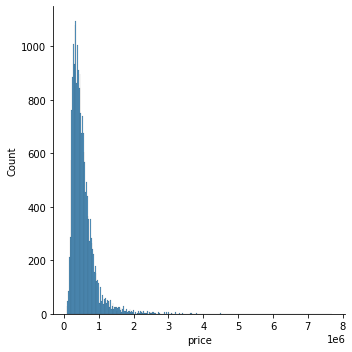

In [ ]:
%matplotlib inline
plt.figure(figsize=(12,12))
sns.displot(data['price'])
plt.show()

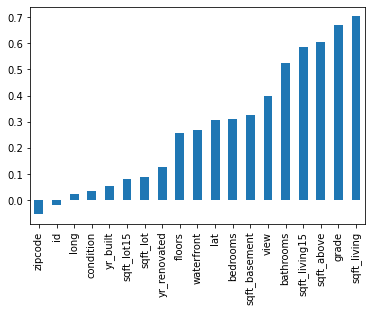

In [ ]:
data.corr()['price'].sort_values()[:-1].plot(kind='bar')

In [ ]:
data.corr()['price'].sort_values()

zipcode         -0.053402
id              -0.016772
long             0.022036
condition        0.036056
yr_built         0.053953
sqft_lot15       0.082845
sqft_lot         0.089876
yr_renovated     0.126424
floors           0.256804
waterfront       0.266398
lat              0.306692
bedrooms         0.308787
sqft_basement    0.323799
view             0.397370
bathrooms        0.525906
sqft_living15    0.585241
sqft_above       0.605368
grade            0.667951
sqft_living      0.701917
price            1.000000
Name: price, dtype: float64

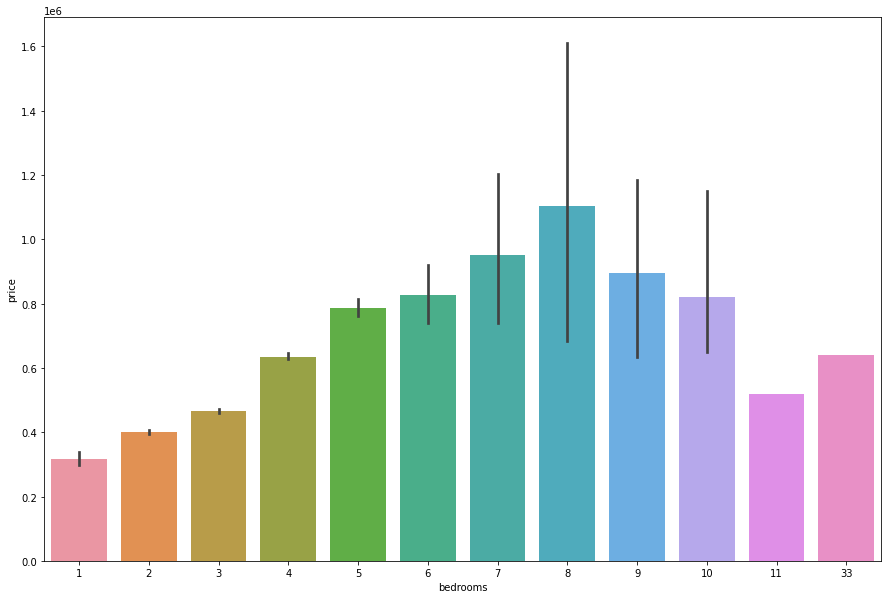

In [ ]:
plt.figure(figsize=(15,10))
sns.barplot(x='bedrooms',y='price',data=data)

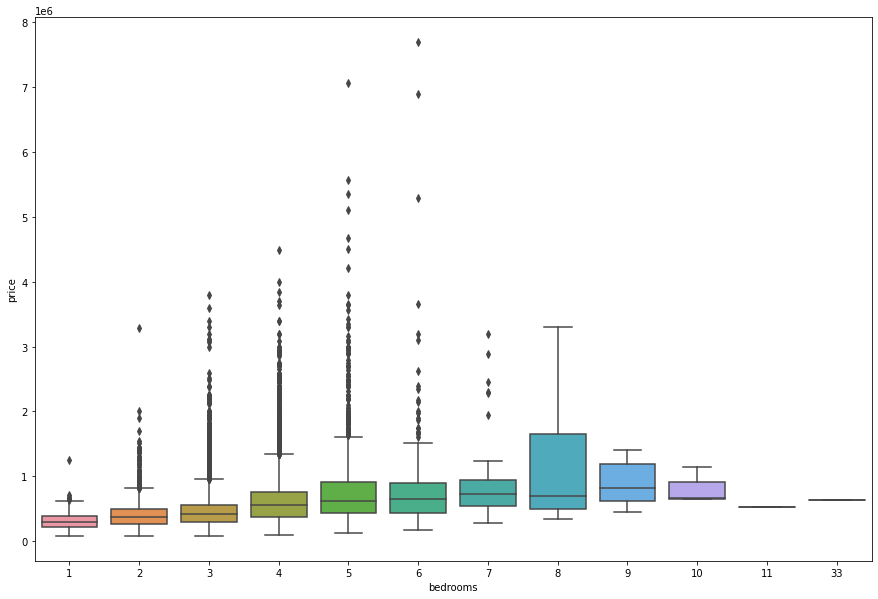

In [ ]:
plt.figure(figsize=(15,10))
sns.boxplot(x='bedrooms',y='price',data=data)

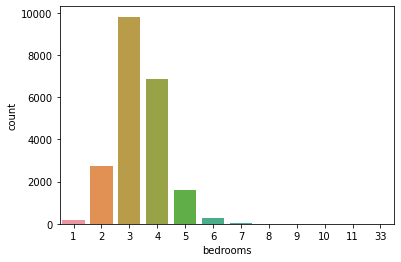

In [ ]:
sns.countplot(x='bedrooms',data=data)

In [ ]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
X =data.drop('id',axis=1)

In [ ]:
X['sqft_basement'].value_counts()

0       13110
600       221
700       218
500       214
800       206
        ...  
792         1
2590        1
935         1
2390        1
248         1
Name: sqft_basement, Length: 306, dtype: int64

In [ ]:
X['yr_renovated'].value_counts()

0       20683
2014       91
2013       37
2003       36
2000       35
        ...  
1934        1
1959        1
1951        1
1948        1
1944        1
Name: yr_renovated, Length: 70, dtype: int64

In [ ]:
# X = X.drop('zipcode',axis=1)
X['zipcode'].value_counts()

98103    602
98038    589
98115    583
98052    574
98117    553
        ... 
98102    104
98010    100
98024     80
98148     57
98039     50
Name: zipcode, Length: 70, dtype: int64

In [ ]:
X = X.drop('zipcode',axis=1)

In [ ]:
X['date'] = pd.to_datetime(X['date'])

In [ ]:
X['date']
X['year'] = X['date'].apply(lambda x : x.year)
X['month'] = X['date'].apply(lambda x : x.month)

In [ ]:
X

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,year,month
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,2014,10
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639,2014,12
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062,2015,2
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000,2014,12
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503,2015,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,2014-05-21,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,47.6993,-122.346,1530,1509,2014,5
21593,2015-02-23,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,47.5107,-122.362,1830,7200,2015,2
21594,2014-06-23,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,47.5944,-122.299,1020,2007,2014,6
21595,2015-01-16,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,47.5345,-122.069,1410,1287,2015,1


In [ ]:
X = X.drop('date',axis=1)

In [ ]:
X

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,year,month
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,2014,10
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639,2014,12
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062,2015,2
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000,2014,12
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503,2015,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,47.6993,-122.346,1530,1509,2014,5
21593,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,47.5107,-122.362,1830,7200,2015,2
21594,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,47.5944,-122.299,1020,2007,2014,6
21595,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,47.5345,-122.069,1410,1287,2015,1


In [ ]:
X.sort_values('price',ascending=False)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,year,month
7245,7700000.0,6,8.00,12050,27600,2.5,0,3,4,13,8570,3480,1910,1987,47.6298,-122.323,3940,8800,2014,10
3910,7060000.0,5,4.50,10040,37325,2.0,1,2,3,11,7680,2360,1940,2001,47.6500,-122.214,3930,25449,2014,6
9245,6890000.0,6,7.75,9890,31374,2.0,0,4,3,13,8860,1030,2001,0,47.6305,-122.240,4540,42730,2014,9
4407,5570000.0,5,5.75,9200,35069,2.0,0,0,3,13,6200,3000,2001,0,47.6289,-122.233,3560,24345,2014,8
1446,5350000.0,5,5.00,8000,23985,2.0,0,4,3,12,6720,1280,2009,0,47.6232,-122.220,4600,21750,2015,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2139,82500.0,2,1.00,520,22334,1.0,0,0,2,5,520,0,1951,0,47.4799,-122.296,1572,10570,2014,5
8267,82000.0,3,1.00,860,10426,1.0,0,0,3,6,860,0,1954,0,47.4987,-122.341,1140,11250,2014,11
16184,81000.0,2,1.00,730,9975,1.0,0,0,1,5,730,0,1943,0,47.4808,-122.315,860,9000,2015,3
465,80000.0,1,0.75,430,5050,1.0,0,0,2,4,430,0,1912,0,47.6499,-121.909,1200,7500,2014,5


In [ ]:
X = X.sort_values('price',ascending=False).iloc[215:]

In [ ]:
X

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,year,month
17221,1970000.0,8,3.50,4440,6480,2.0,0,3,5,10,3140,1300,1959,0,47.6310,-122.303,4440,8640,2014,5
6329,1970000.0,4,3.50,4370,8510,2.0,0,1,3,10,3610,760,2003,0,47.5876,-122.204,2960,10347,2014,6
12271,1960000.0,5,4.50,6200,23373,3.0,0,1,4,11,5050,1150,1988,0,47.5632,-122.215,3700,14486,2014,10
9166,1960000.0,3,1.75,3330,12566,1.0,1,4,4,8,1940,1390,1960,0,47.5287,-122.220,3730,16560,2015,2
12565,1960000.0,4,4.00,4430,31353,2.0,0,0,3,12,4430,0,1998,0,47.6422,-122.157,3900,35237,2015,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2139,82500.0,2,1.00,520,22334,1.0,0,0,2,5,520,0,1951,0,47.4799,-122.296,1572,10570,2014,5
8267,82000.0,3,1.00,860,10426,1.0,0,0,3,6,860,0,1954,0,47.4987,-122.341,1140,11250,2014,11
16184,81000.0,2,1.00,730,9975,1.0,0,0,1,5,730,0,1943,0,47.4808,-122.315,860,9000,2015,3
465,80000.0,1,0.75,430,5050,1.0,0,0,2,4,430,0,1912,0,47.6499,-121.909,1200,7500,2014,5


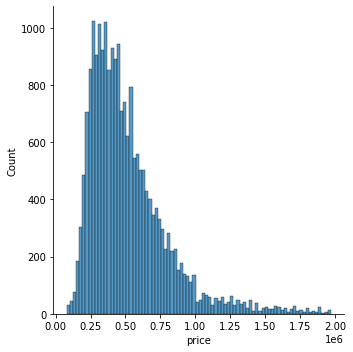

In [ ]:
sns.displot(X['price'])

In [ ]:
y = X['price'].values
X = X.drop('price',axis=1).values

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30)

In [ ]:
scaler = StandardScaler()

In [ ]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
model = Sequential()

In [ ]:
X_train.shape

(14967, 19)

In [ ]:
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

In [ ]:
model.fit(X_train,y_train,batch_size=128,verbose=1,validation_data=(X_test,y_test),epochs=500)

Epoch 1/500
117/117 [==============================] - 1s 3ms/step - loss: 350233788416.0000 - val_loss: 349589602304.0000
Epoch 2/500
117/117 [==============================] - 0s 2ms/step - loss: 350011293696.0000 - val_loss: 348960391168.0000
Epoch 3/500
117/117 [==============================] - 0s 3ms/step - loss: 348312928256.0000 - val_loss: 345535709184.0000
Epoch 4/500
117/117 [==============================] - 0s 3ms/step - loss: 342088646656.0000 - val_loss: 335221096448.0000
Epoch 5/500
117/117 [==============================] - 0s 3ms/step - loss: 326441926656.0000 - val_loss: 312135942144.0000
Epoch 6/500
117/117 [==============================] - 0s 2ms/step - loss: 296183693312.0000 - val_loss: 272481714176.0000
Epoch 7/500
117/117 [==============================] - 0s 2ms/step - loss: 250110640128.0000 - val_loss: 218402816000.0000
Epoch 8/500
117/117 [==============================] - 0s 2ms/step - loss: 193679622144.0000 - val_loss: 159511199744.0000
Epoch 9/500
117/

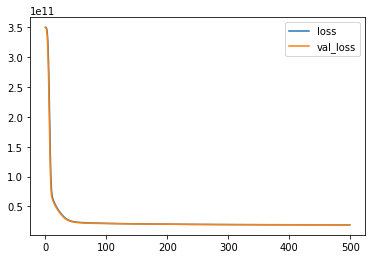

In [ ]:
loss = model.history.history
df_loss = pd.DataFrame(loss)
df_loss.plot()

In [ ]:
predictions = model.predict(X_test)

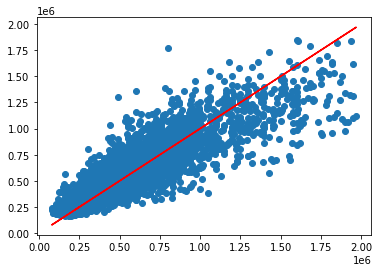

In [ ]:
plt.scatter(y_test,predictions)
plt.plot(y_test,y_test,'r')

In [ ]:
model.evaluate(X_test,y_test)

201/201 [==============================] - 0s 1ms/step - loss: 19070763008.0000


19070763008.0

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [ ]:
print(mean_absolute_error(y_test,predictions))

92936.96363016368


In [ ]:
print(mean_squared_error(y_test,predictions))

19070759351.843204


In [ ]:
print('RMSE :',np.sqrt(mean_squared_error(y_test,predictions)))

RMSE : 138096.9201388764


In [ ]:
data['price'].mean()

540296.5735055795